In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hindihits","key":"4787c833daac9b9d292c96b81726ee6c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Example for the Fashion MNIST dataset
!kaggle datasets download -d imbikramsaha/paddy-doctor --unzip

Dataset URL: https://www.kaggle.com/datasets/imbikramsaha/paddy-doctor
License(s): CC0-1.0
 94% 976M/1.02G [00:11<00:01, 46.0MB/s]
100% 1.02G/1.02G [00:11<00:00, 97.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# List files to confirm download
print(os.listdir())

['.config', 'drive', 'kaggle.json', 'paddy-disease-classification', 'sample_data']


In [ ]:
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
df = pd.read_csv("./paddy-disease-classification/train.csv")
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
df['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [ ]:
df['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [ ]:
count=df['variety'].value_counts()
count

,count
variety,
ADT45,6992
KarnatakaPonni,988
Ponni,657
AtchayaPonni,461
Zonal,399
AndraPonni,377
Onthanel,351
IR20,114
RR,36


<BarContainer object of 10 artists>

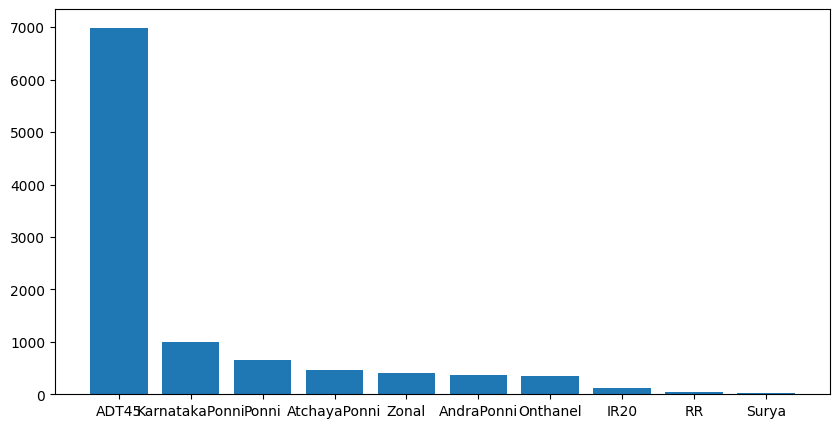

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(count.index,count.values)

In [ ]:
normal=df.loc[(df['label']=='normal') & (df['variety']=='ADT45')]
normal=normal.image_id[2:7]
normal.tolist()

['100135.jpg', '100165.jpg', '100171.jpg', '100186.jpg', '100188.jpg']

In [ ]:
dead=df.loc[(df['label']=='dead_heart') & (df['variety']=='ADT45')]
dead=dead.image_id[2:7].values
dead.tolist()

['108367.jpg', '109900.jpg', '100222.jpg', '100670.jpg', '100715.jpg']

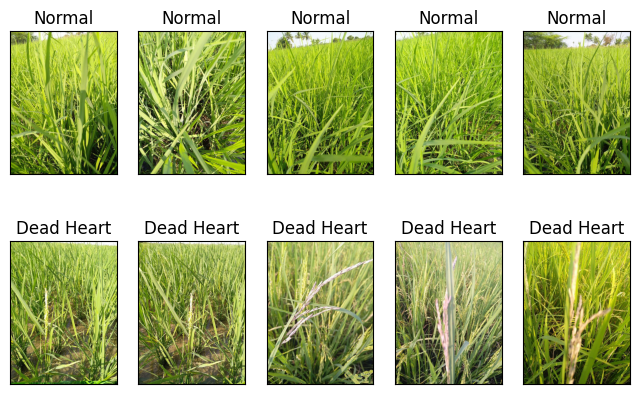

In [ ]:
path='./paddy-disease-classification/train_images'

plt.figure(figsize=(8,5))
for i,image_loc in enumerate(np.concatenate((normal,dead))):
  plt.subplot(2,5,i+1)

  if i<5:
    image=plt.imread(path+'/normal/'+image_loc)
    plt.title('Normal')
  else:
    image=plt.imread(path+'/dead_heart/'+image_loc)
    plt.title('Dead Heart')

  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)

In [ ]:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['variety'] = label_encoder.fit_transform(df['variety'])

df.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [ ]:
# define parameter
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(path,validation_split=0.2,subset='training',image_size=(img_height,img_width),batch_size=32,
                                                     seed=123)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [ ]:
for image_batch,label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(label_batch[:10])

(640, 480, 3)
tf.Tensor([5 4 5 9 9 3 0 5 7 4], shape=(10,), dtype=int32)


In [ ]:
normalization_layer=tf.keras.layers.Rescaling(1./255,)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=2)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[early_stopping])

Epoch 1/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9811 - loss: 0.0537 - val_accuracy: 0.8462 - val_loss: 1.0325
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.9824 - loss: 0.0575 - val_accuracy: 0.8462 - val_loss: 0.9564
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.9813 - loss: 0.0560 - val_accuracy: 0.8107 - val_loss: 1.0874
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9832 - loss: 0.0511 - val_accuracy: 0.8640 - val_loss: 0.8303
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9878 - loss: 0.0371 - val_accuracy: 0.8568 - val_loss: 0.9439
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9838 - loss: 0.0667 - val_accuracy: 0.8366 - val_loss: 1.0850


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/mangalneeraj3/Deep_learnning_moodels.git

Cloning into 'Deep_learnning_moodels'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 3.04 MiB | 11.59 MiB/s, done.


In [3]:
%cd Deep_learnning_moodels
!git status

/content/Deep_learnning_moodels
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'CNN rice classification.ipynb'		 'nlp bASICS.ipynb'    Untitled1.ipynb
'Copy of CNN rice classification.ipynb'   NN2.ipynb	       Untitled2.ipynb
'Copy of Fashion_Mnist.ipynb'		  NN3_graph.ipynb      Untitled3.ipynb
 Fashion_Mnist.ipynb			 'NN(titanic).ipynb'   Untitled4.ipynb
'flower classification.ipynb'		  Untitled	       Untitled5.ipynb
 Mnist.ipynb				  Untitled0.ipynb


In [6]:
!cp "/content/drive/MyDrive/Colab Notebooks/CNN rice classification" .

cp: cannot stat "/content/drive/MyDrive/Colab Notebooks/'CNN rice classification'": No such file or directory


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/CNN rice classification.ipynb" .